In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importing dataset

In [2]:
dataset = pd.read_csv('fb_data.csv')

1.)How does the time of upload (status_published)  affects the num_reaction?


In [3]:
dataset['status_published'] = pd.to_datetime(dataset['status_published'])

In [4]:
dataset['hour'] = dataset['status_published'].dt.hour
dataset['day_of_week'] = dataset['status_published'].dt.day_name()

 Plot reactions by hour of day

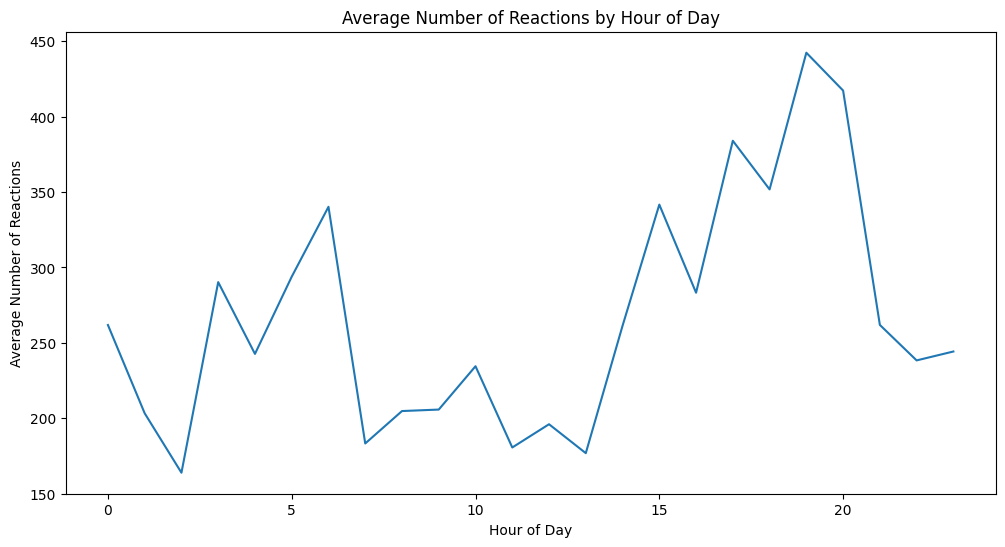

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset.groupby('hour')['num_reactions'].mean().reset_index(), x='hour', y='num_reactions')
plt.title('Average Number of Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.show()

Plot reactions by day of the week

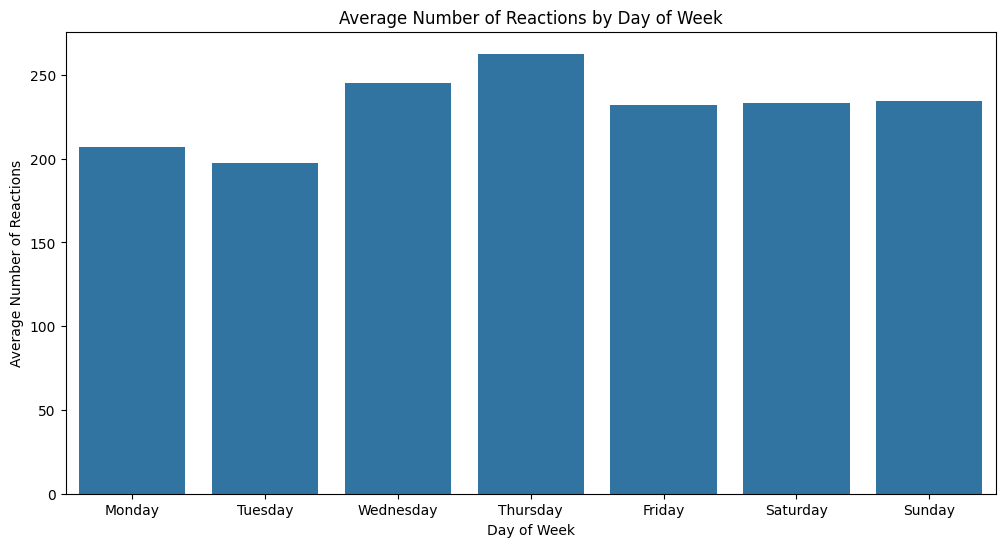

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dataset.groupby('day_of_week')['num_reactions'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index(),
    x='day_of_week', y='num_reactions')
plt.title('Average Number of Reactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Reactions')
plt.show()

2.)Correlation between Engagement Metrics (num_reactions, num_comments, num_shares)

Correlation matrix:
                num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


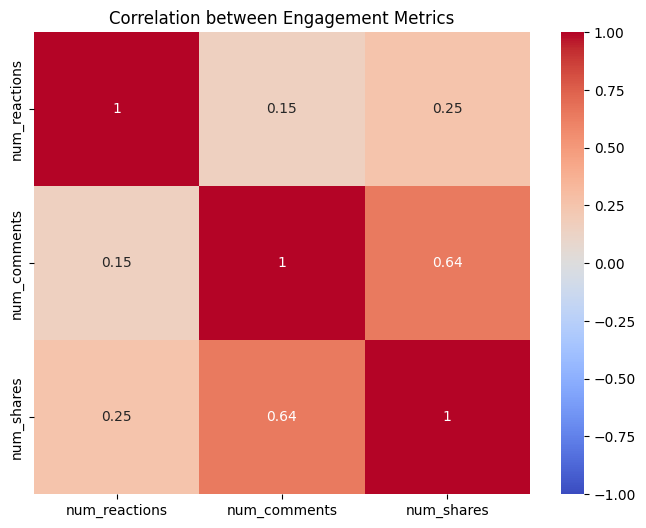

In [10]:
correlation = dataset[['num_reactions', 'num_comments', 'num_shares']].corr()
print("Correlation matrix:\n", correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Engagement Metrics')
plt.show()

3. K-Means Clustering on Engagement and Reaction Metrics

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
features = dataset[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
               'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

elbow method

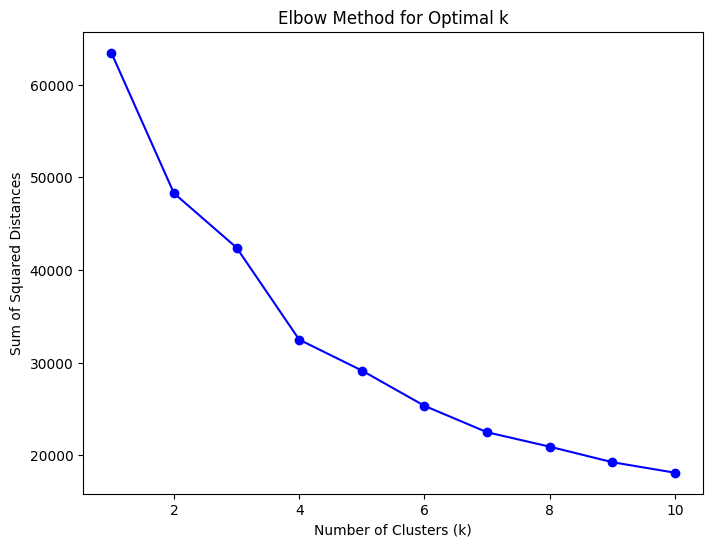

In [14]:
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

4. Count of Different Types of Posts

In [15]:
post_type_counts = dataset['status_type'].value_counts()
print("Post type counts:\n", post_type_counts)


Post type counts:
 status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


5. Average Engagement per Post Type

In [17]:
avg_engagement = dataset.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("Average engagement per post type:\n", avg_engagement)

Average engagement per post type:
              num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
